In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
dataset = pd.read_csv("./dataset/bank-additional-full.csv")
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<h1><i>Univariate Analysis Before any pre processing and feature engineering of data<i></h1>
<p>Analysis done for selecting the column that can be used for model fitting as well as the test for pre processing and feature engineering</p>

## For Categorical Data

In [3]:
categorical_columns = dataset.select_dtypes(include="object")
numeric_columns = dataset.select_dtypes(include=np.number)

In [4]:
import json

In [5]:
# Descriptive statistics of the categorical column
def categorical_data_description(category: str) -> None: 

    '''
    # Code used to print the grouped data into a table
    def dataframe_from_json(json_data):
        json_data = json.loads(json_data)
        category, outcome_no, outcome_yes = [], [], []
        data = {}

        def format_key(key):
            key = key.split(",")
            key[0] = str(key[0].strip("(").replace("'", ""))
            key[1] = str(key[1].strip(")").replace("'", "")[1:])
            return key

        for key in json_data.keys():
            dummy_key = format_key(key)

            if dummy_key[0] not in category:
                category.append(dummy_key[0])
            
            if dummy_key[1] == "no":
                outcome_no.insert(category.index(dummy_key[0]), json_data[key])
            
            elif dummy_key[1] == "yes":
                outcome_yes.insert(category.index(dummy_key[0]), json_data[key])

        data["category"] = category
        data["No"] = outcome_no
        data["Yes"] = outcome_yes
        
        return pd.DataFrame(data)
    '''

    print("--------------------------------------------------------")
    print(f"Unique values in column: {category} \n {dataset[category].unique()}")
    print("--------------------------------------------------------")
    print(f"Value Counts in column: {category} \n {dataset[category].value_counts()}")
    print("--------------------------------------------------------")
    print(f"Counts after grouping by outcome for {category}: \n")
    display(dataset['y'].groupby(dataset[category]).value_counts())
    # display(dataframe_from_json(dataset['y'].groupby(dataset[category]).value_counts().to_json()))
    print("--------------------------------------------------------")

In [6]:
# Descriptive statistics of the numeric column
def numerical_data_description(category: str) -> None: 
    print("--------------------------------------------------------")
    print(f"Descriptive information of {category}: \n{dataset[category].describe()}")
    print("--------------------------------------------------------")

In [7]:
# Count plot that can be plotted for categorical data
def count_plot(category: str, horizontal: bool=False) -> None:
    fig, axes = plt.subplots(1, 2, figsize=(18, 10))
    plt.suptitle(f"Visualization of {category}")

    if horizontal:
        sns.countplot(ax=axes[0], data=dataset, y=dataset[category])
        axes[0].set_title("Count Plot")

        # For comparing with the outcome
        sns.countplot(ax=axes[1], data=dataset, y=dataset[category], hue="y")
        axes[1].set_title("Comparision with output") 

    else:
        sns.countplot(ax=axes[0], data=dataset, x=dataset[category])
        axes[0].set_title("Count Plot") 
        
        # For comparing with the outcome
        sns.countplot(ax=axes[1], data=dataset, x=dataset[category], hue="y")
        axes[1].set_title("Comparing with output") 
    
    plt.show()

In [8]:
#Visualization of continuous data
def histogram_plot(category: str) -> None:
    # plt.figure(figsize=(8,6))
    plt.suptitle(f"Histogram of {category}")
    sns.histplot(data=dataset, x=dataset[category], kde=True)
    plt.plot()

In [9]:
def univariate_viz_with_desc(category, viz_orient=False):
    if category in categorical_columns:
        categorical_data_description(category)
        count_plot(category, viz_orient)  
    elif category in numeric_columns:
        numerical_data_description(category)
        histogram_plot(category)
    else:
        print("No such category in dataset. Check spelling or the dataset.")

--------------------------------------------------------
Unique values in column: job 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
--------------------------------------------------------
Value Counts in column: job 
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for job: 



job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
Name: y, dtype: int64

--------------------------------------------------------


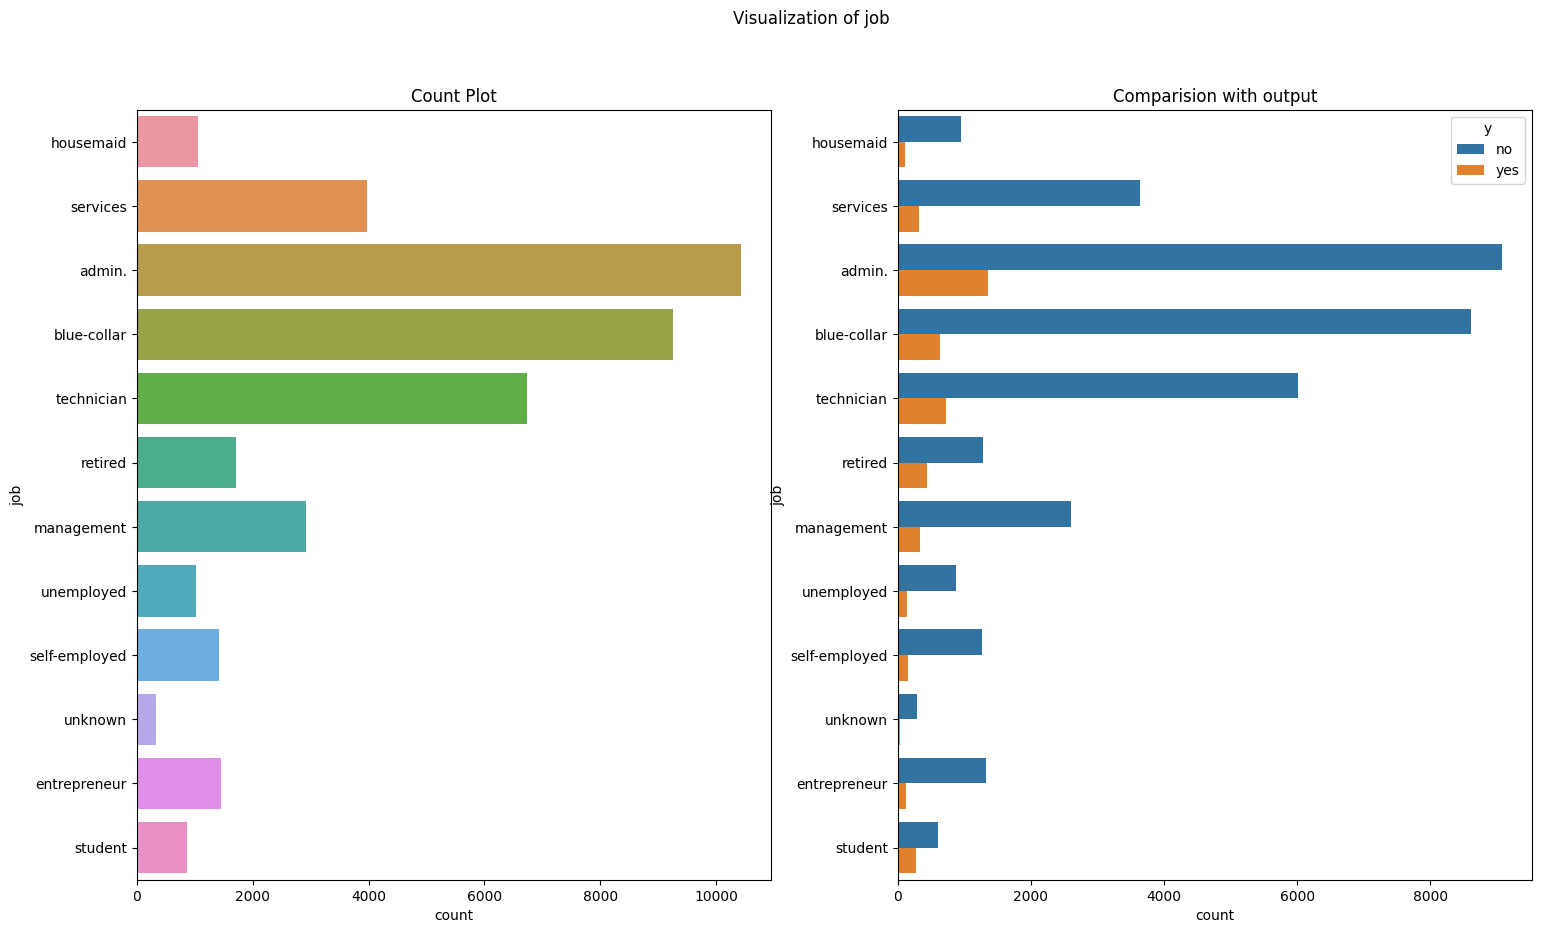

In [10]:
univariate_viz_with_desc("job", viz_orient=True)

<p style="color: yellow;"><i>most of the clients have a job of an admin, and there are 330 clients with unknown jobs. As well most clients probable of accepting a term deposite are form admin profession too.<i></P>

--------------------------------------------------------
Unique values in column: marital 
 ['married' 'single' 'divorced' 'unknown']
--------------------------------------------------------
Value Counts in column: marital 
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for marital: 



marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948
          yes     1620
unknown   no        68
          yes       12
Name: y, dtype: int64

--------------------------------------------------------


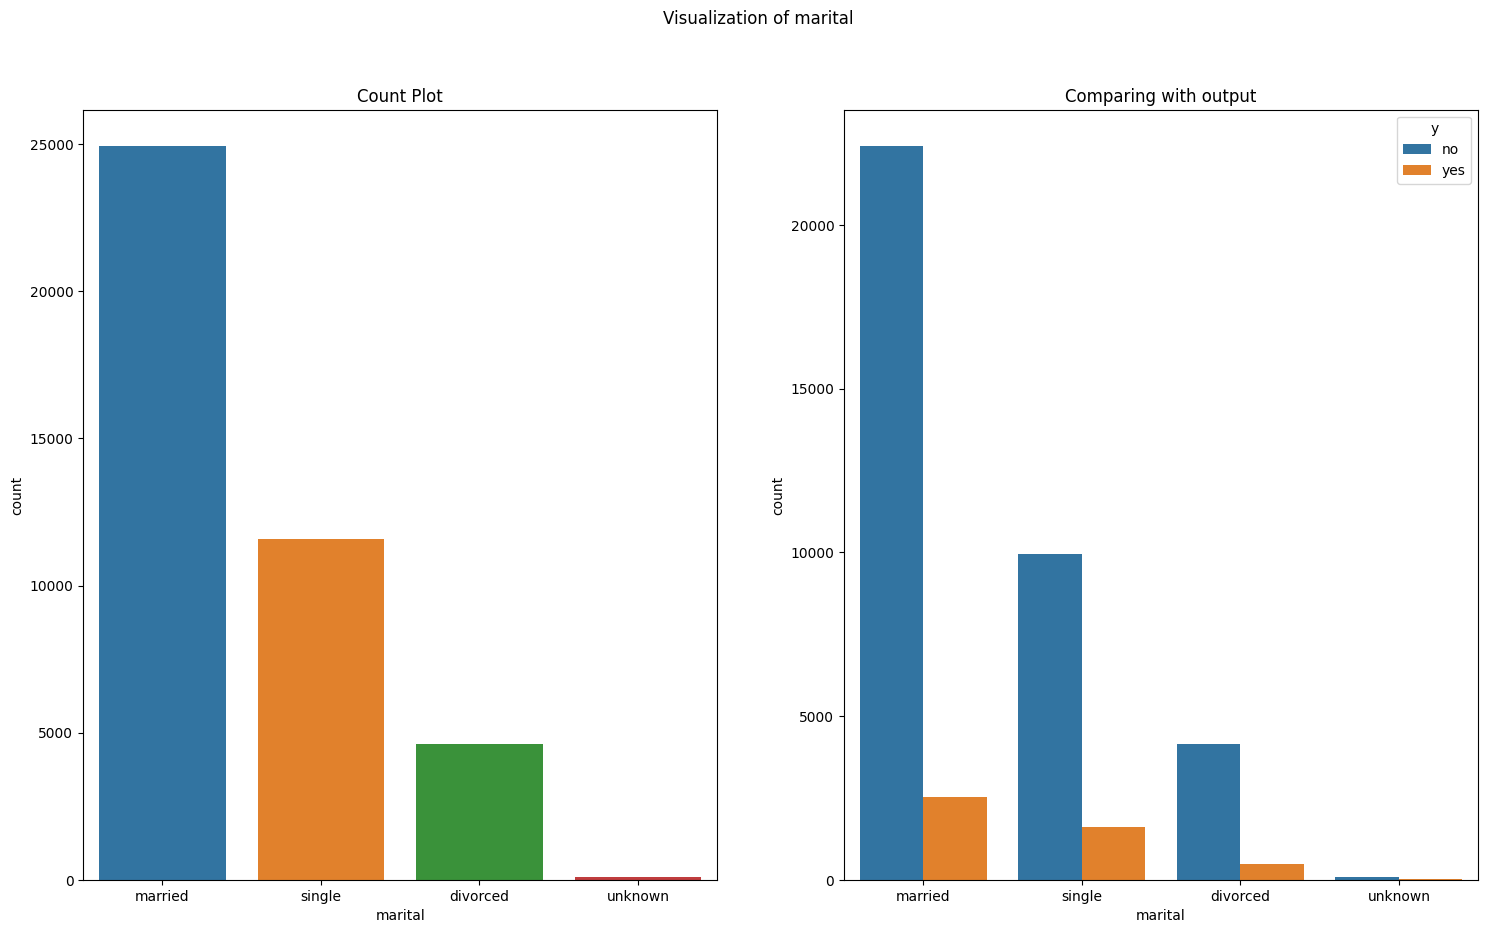

In [11]:
univariate_viz_with_desc("marital")

<p style="color: yellow;"><i>Most clients are married with maximum probability of accepting term deposite.<i></P>

--------------------------------------------------------
Unique values in column: education 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
--------------------------------------------------------
Value Counts in column: education 
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for education: 



education            y  
basic.4y             no      3748
                     yes      428
basic.6y             no      2104
                     yes      188
basic.9y             no      5572
                     yes      473
high.school          no      8484
                     yes     1031
illiterate           no        14
                     yes        4
professional.course  no      4648
                     yes      595
university.degree    no     10498
                     yes     1670
unknown              no      1480
                     yes      251
Name: y, dtype: int64

--------------------------------------------------------


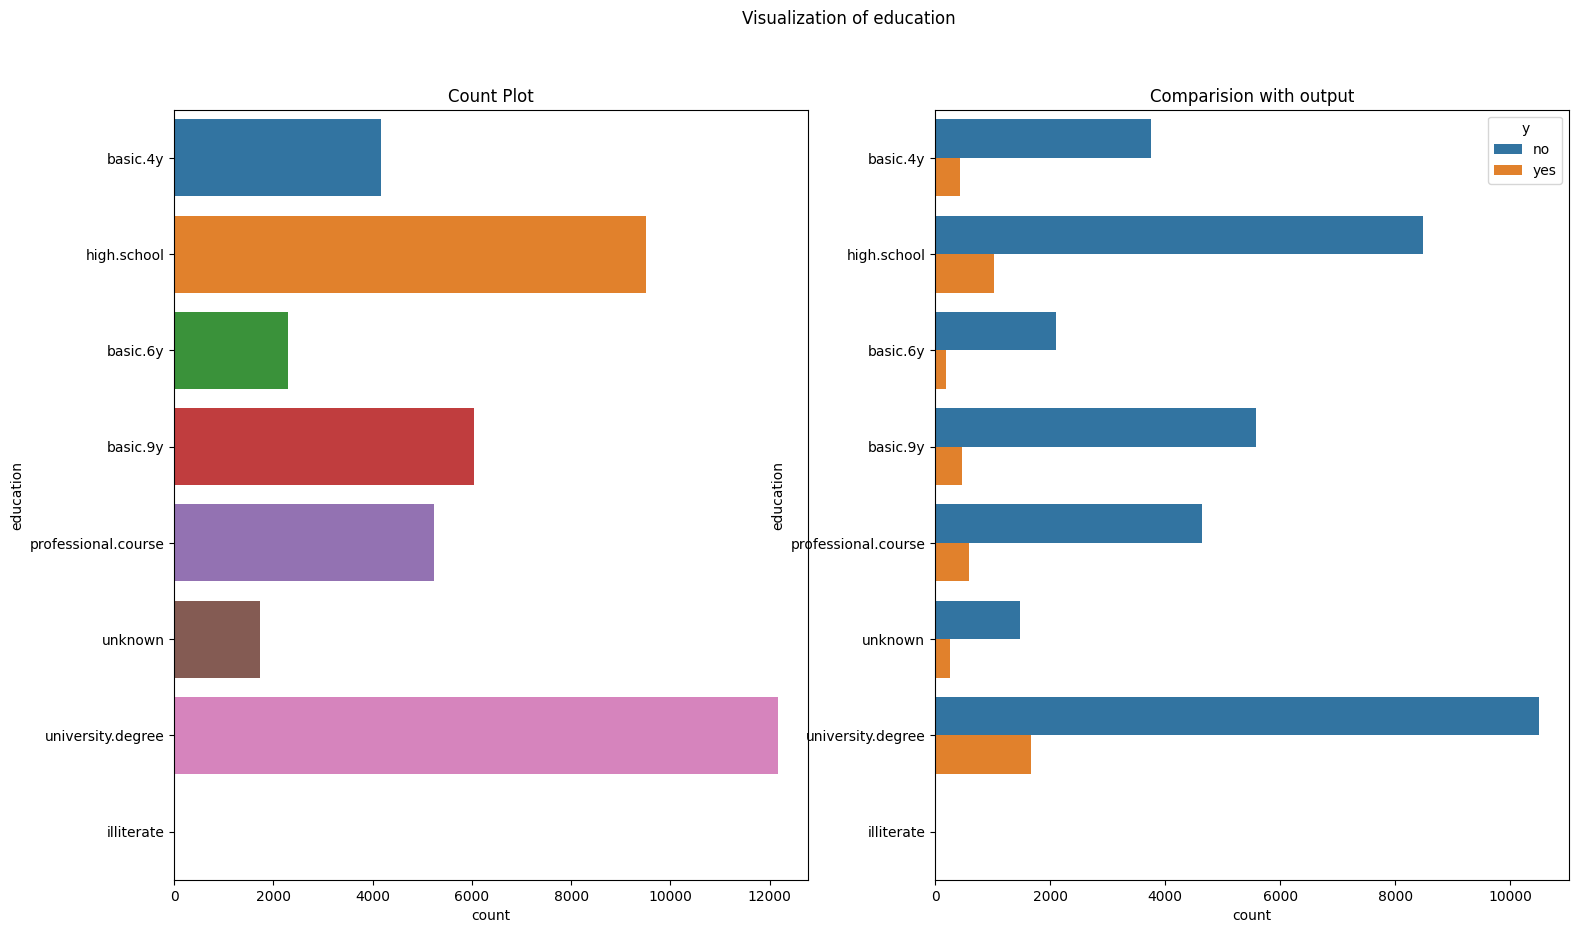

In [12]:
univariate_viz_with_desc("education", viz_orient=True)

<p style="color: yellow;"><i>Most clients have a university degree; with maximum number of accepting the term deposite scheme. And there are few illeterate clients, could remove those row.</i></p>

--------------------------------------------------------
Unique values in column: default 
 ['no' 'unknown' 'yes']
--------------------------------------------------------
Value Counts in column: default 
 no         32588
unknown     8597
yes            3
Name: default, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for default: 



default  y  
no       no     28391
         yes     4197
unknown  no      8154
         yes      443
yes      no         3
Name: y, dtype: int64

--------------------------------------------------------


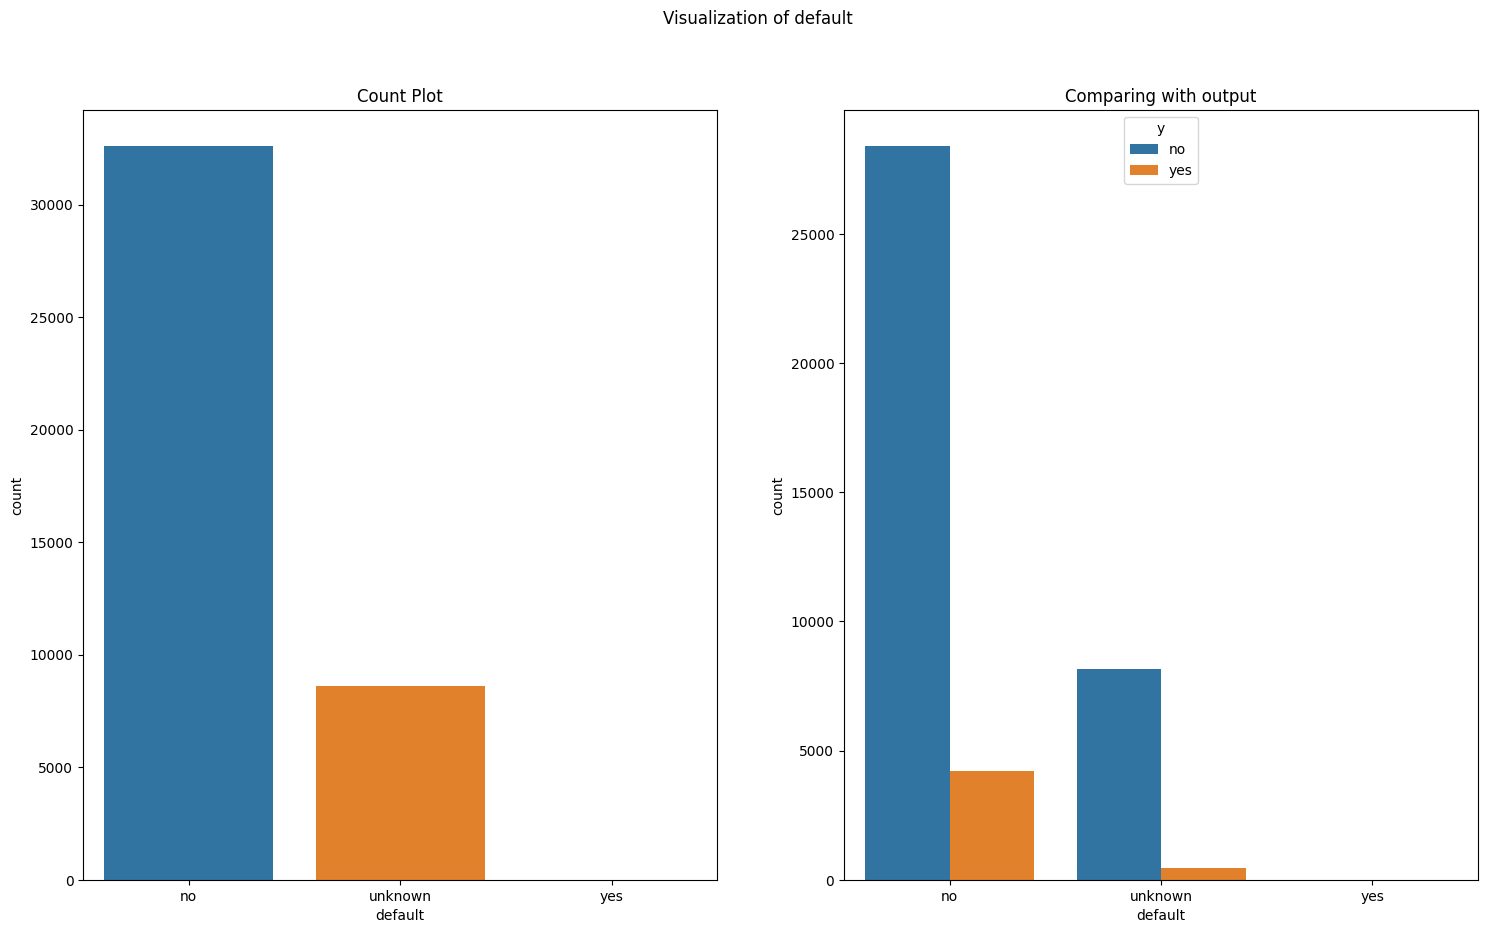

In [13]:
univariate_viz_with_desc("default")

<p style="color: yellow;"><i>Most client don't have a cerdit and those are the one most probably accepting term deposite. As well there are unknown data, could remove those row.</i></p>

--------------------------------------------------------
Unique values in column: housing 
 ['no' 'yes' 'unknown']
--------------------------------------------------------
Value Counts in column: housing 
 yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for housing: 



housing  y  
no       no     16596
         yes     2026
unknown  no       883
         yes      107
yes      no     19069
         yes     2507
Name: y, dtype: int64

--------------------------------------------------------


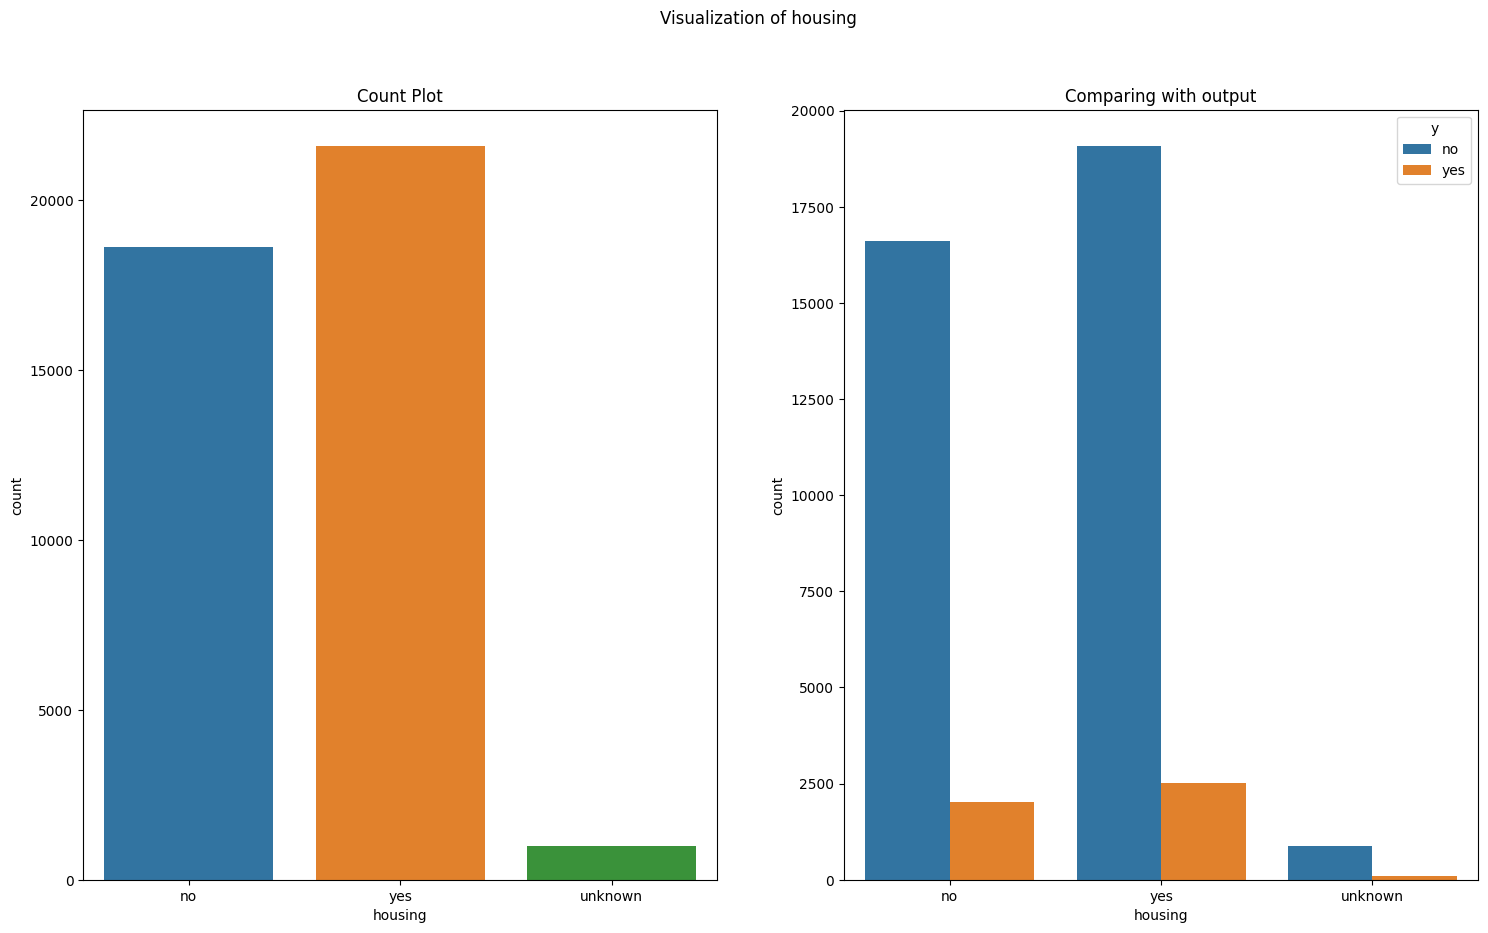

In [14]:
univariate_viz_with_desc("housing")

<p style="color: yellow;"><i>Most client have a house loan and those are the one most probably accepting term deposite.</i></p>

--------------------------------------------------------
Unique values in column: loan 
 ['no' 'yes' 'unknown']
--------------------------------------------------------
Value Counts in column: loan 
 no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for loan: 



loan     y  
no       no     30100
         yes     3850
unknown  no       883
         yes      107
yes      no      5565
         yes      683
Name: y, dtype: int64

--------------------------------------------------------


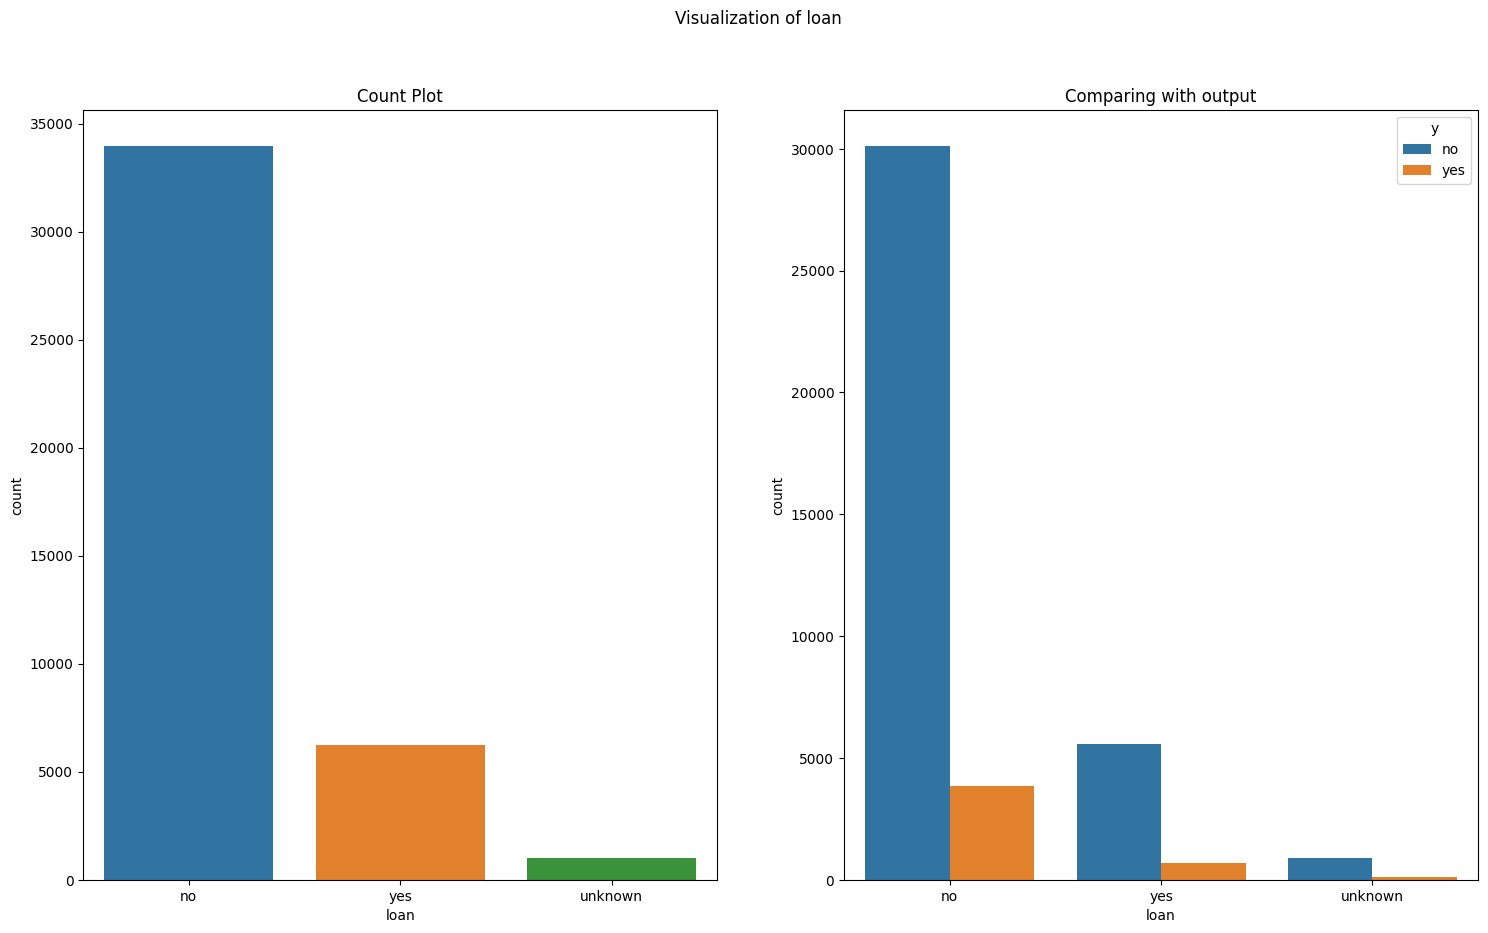

In [15]:
univariate_viz_with_desc("loan")

<p style="color: yellow;"><i>Most client don't have a personal loan and those are the one most probably accepting term deposite.</i></p>

--------------------------------------------------------
Unique values in column: contact 
 ['telephone' 'cellular']
--------------------------------------------------------
Value Counts in column: contact 
 cellular     26144
telephone    15044
Name: contact, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for contact: 



contact    y  
cellular   no     22291
           yes     3853
telephone  no     14257
           yes      787
Name: y, dtype: int64

--------------------------------------------------------


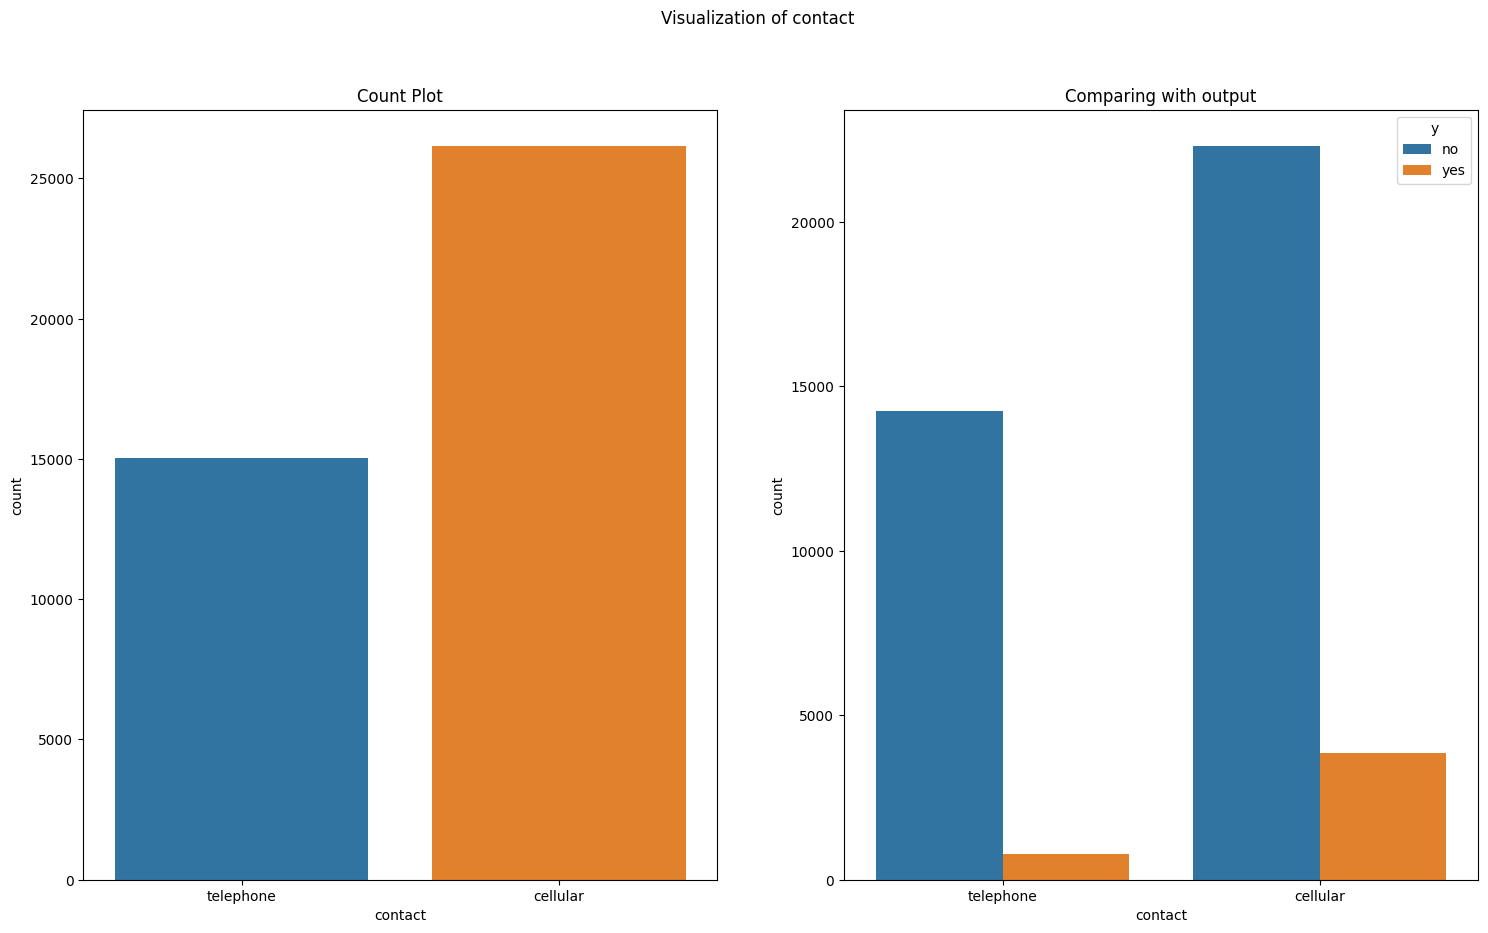

In [16]:
univariate_viz_with_desc("contact")

--------------------------------------------------------
Unique values in column: month 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
--------------------------------------------------------
Value Counts in column: month 
 may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for month: 



month  y  
apr    no      2093
       yes      539
aug    no      5523
       yes      655
dec    no        93
       yes       89
jul    no      6525
       yes      649
jun    no      4759
       yes      559
mar    yes      276
       no       270
may    no     12883
       yes      886
nov    no      3685
       yes      416
oct    no       403
       yes      315
sep    no       314
       yes      256
Name: y, dtype: int64

--------------------------------------------------------


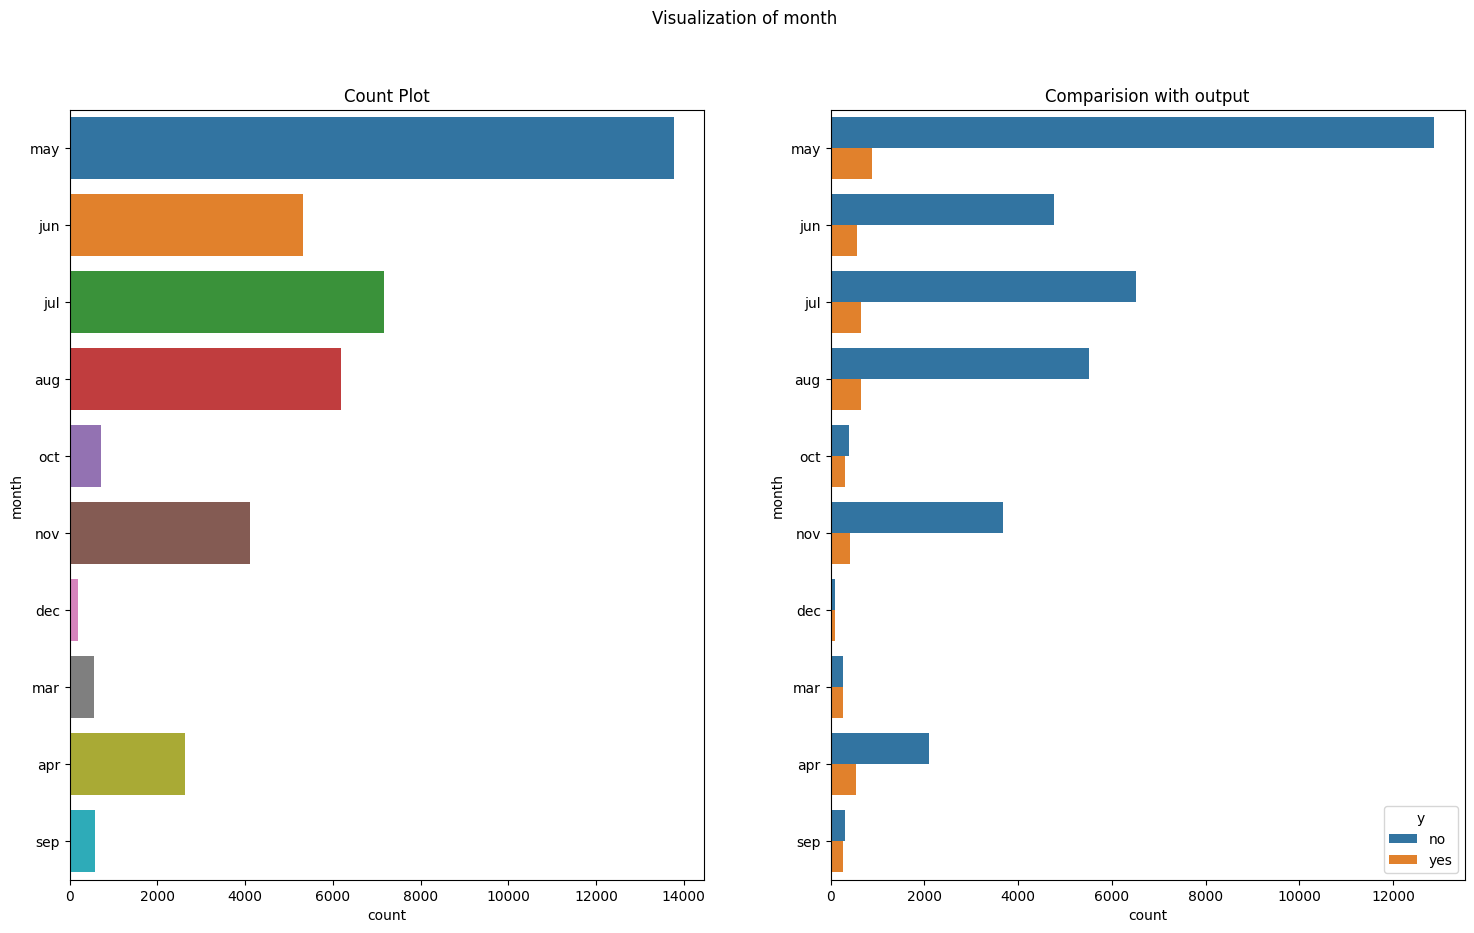

In [17]:
univariate_viz_with_desc("month", viz_orient=True)

--------------------------------------------------------
Unique values in column: day_of_week 
 ['mon' 'tue' 'wed' 'thu' 'fri']
--------------------------------------------------------
Value Counts in column: day_of_week 
 thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for day_of_week: 



day_of_week  y  
fri          no     6981
             yes     846
mon          no     7667
             yes     847
thu          no     7578
             yes    1045
tue          no     7137
             yes     953
wed          no     7185
             yes     949
Name: y, dtype: int64

--------------------------------------------------------


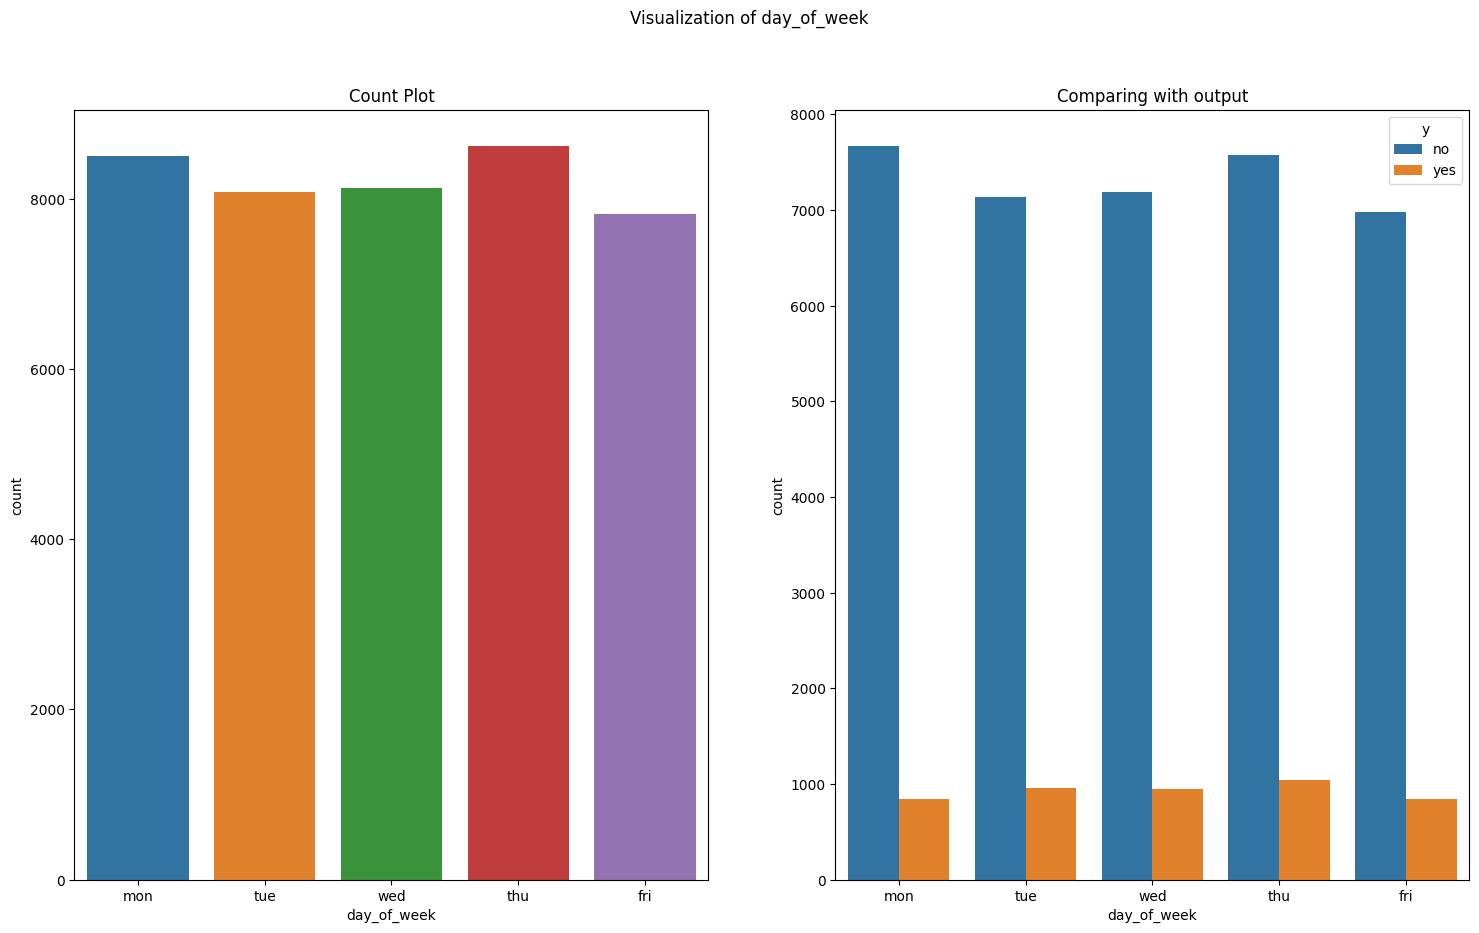

In [18]:
univariate_viz_with_desc("day_of_week")

--------------------------------------------------------
Unique values in column: poutcome 
 ['nonexistent' 'failure' 'success']
--------------------------------------------------------
Value Counts in column: poutcome 
 nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for poutcome: 



poutcome     y  
failure      no      3647
             yes      605
nonexistent  no     32422
             yes     3141
success      yes      894
             no       479
Name: y, dtype: int64

--------------------------------------------------------


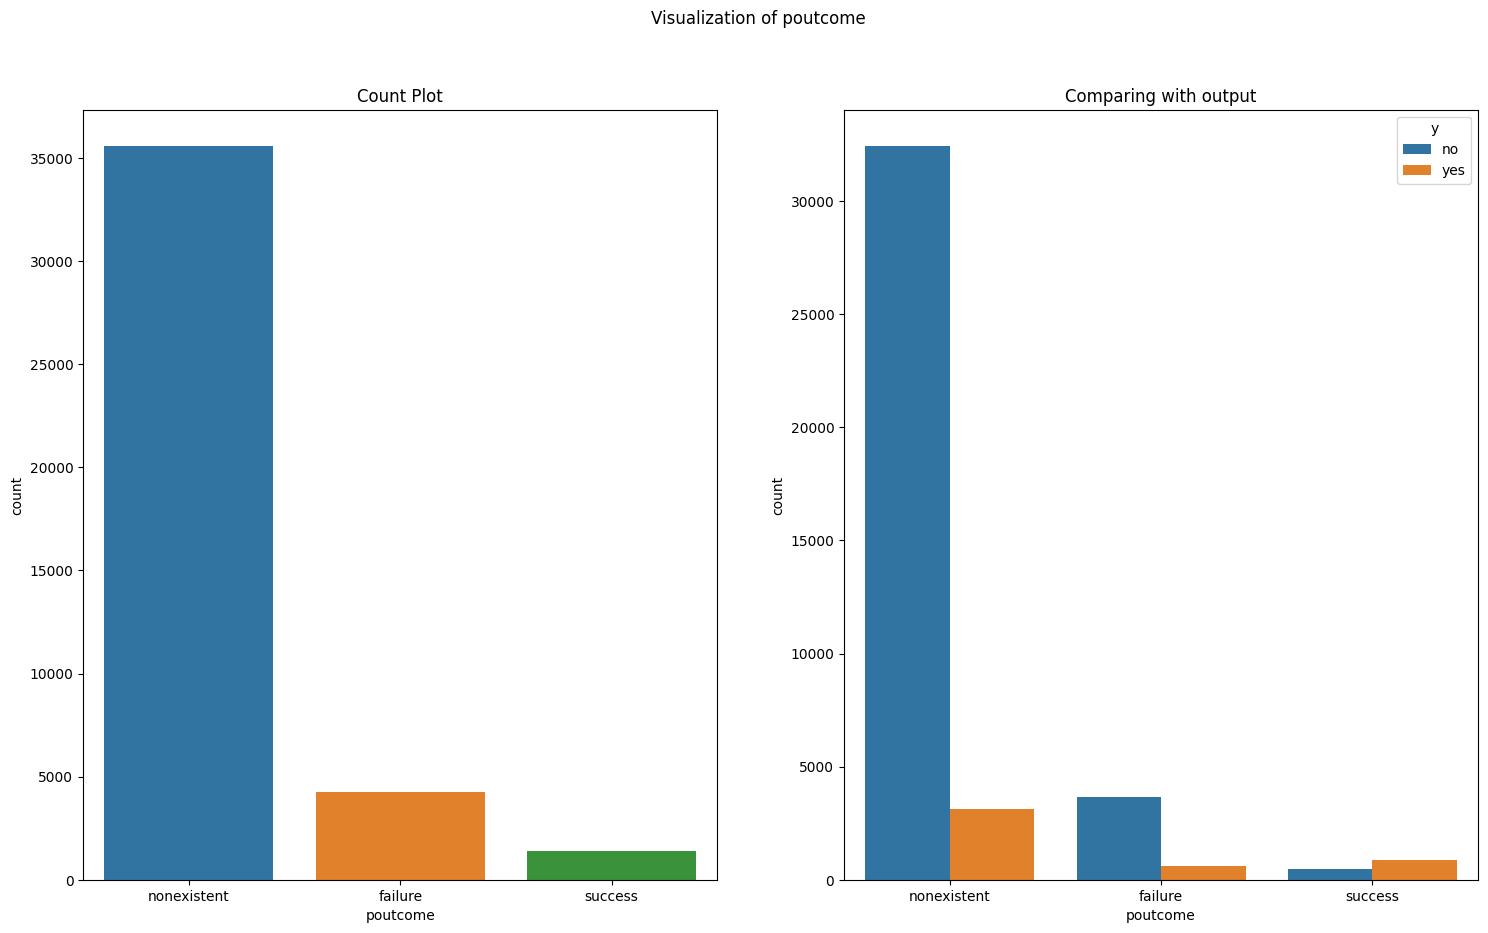

In [19]:
univariate_viz_with_desc("poutcome")

--------------------------------------------------------
Unique values in column: y 
 ['no' 'yes']
--------------------------------------------------------
Value Counts in column: y 
 no     36548
yes     4640
Name: y, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for y: 



y    y  
no   no     36548
yes  yes     4640
Name: y, dtype: int64

--------------------------------------------------------


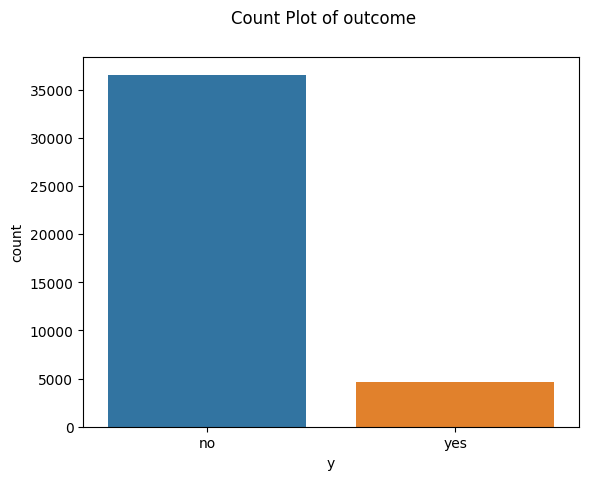

In [20]:
categorical_data_description("y")
plt.suptitle("Count Plot of outcome")
sns.countplot(data=dataset, x=dataset["y"])
plt.show()

## For Continuous Data

--------------------------------------------------------
Descriptive information of age: 
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
--------------------------------------------------------


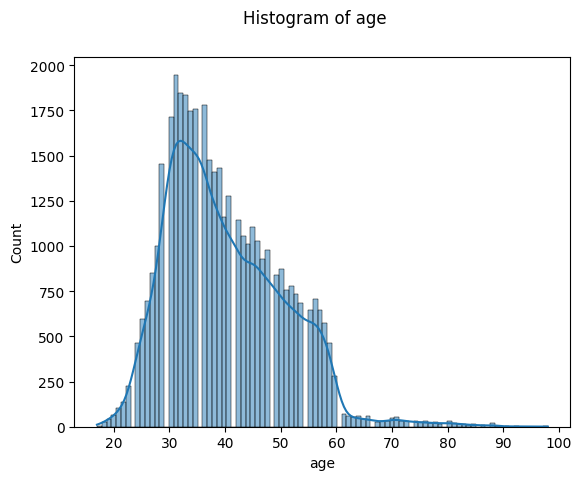

In [21]:
univariate_viz_with_desc("age")

--------------------------------------------------------
Descriptive information of duration: 
count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
--------------------------------------------------------


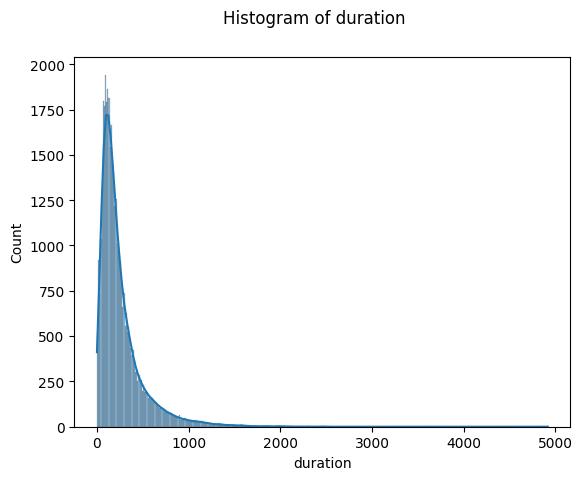

In [22]:
univariate_viz_with_desc("duration")

--------------------------------------------------------
Descriptive information of campaign: 
count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64
--------------------------------------------------------


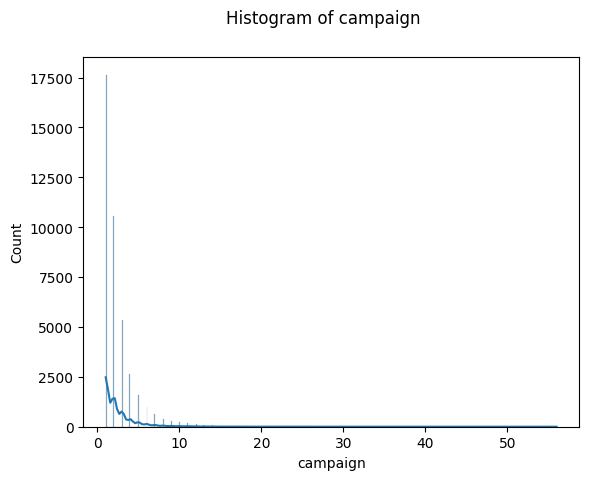

In [23]:
univariate_viz_with_desc("campaign")

--------------------------------------------------------
Descriptive information of pdays: 
count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64
--------------------------------------------------------


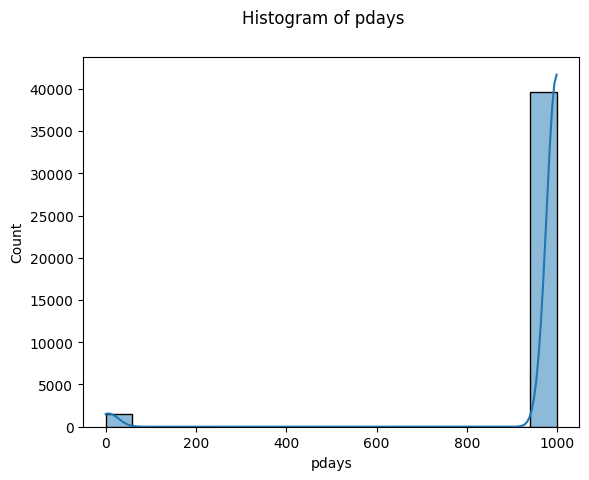

In [24]:
univariate_viz_with_desc("pdays")

--------------------------------------------------------
Descriptive information of previous: 
count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64
--------------------------------------------------------


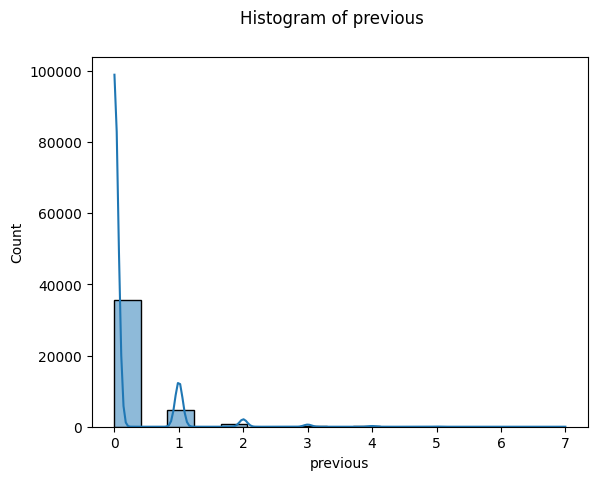

In [25]:
univariate_viz_with_desc("previous")

--------------------------------------------------------
Descriptive information of emp.var.rate: 
count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64
--------------------------------------------------------


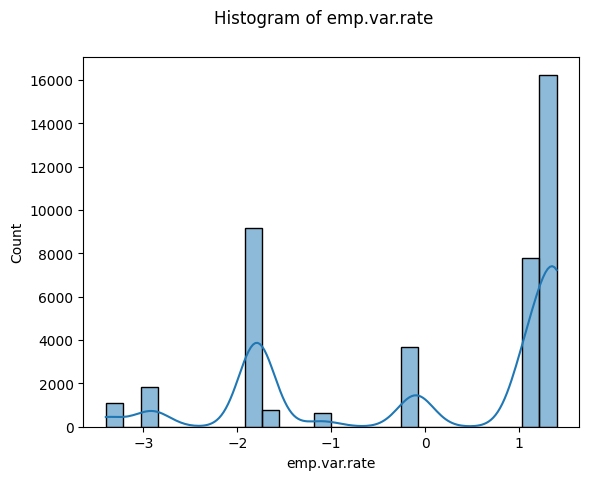

In [26]:
univariate_viz_with_desc("emp.var.rate")

--------------------------------------------------------
Descriptive information of cons.price.idx: 
count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64
--------------------------------------------------------


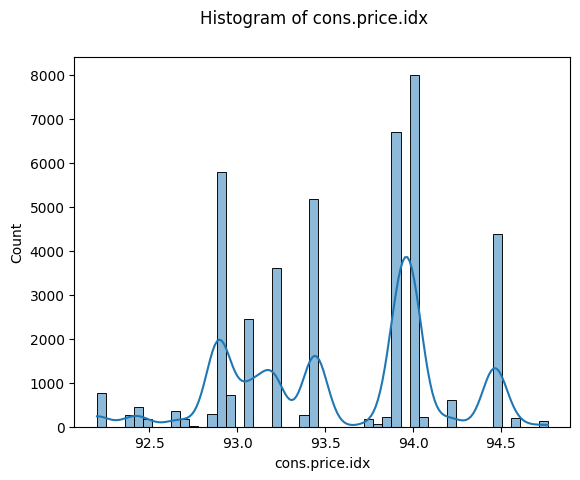

In [27]:
univariate_viz_with_desc("cons.price.idx")

--------------------------------------------------------
Descriptive information of cons.conf.idx: 
count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64
--------------------------------------------------------


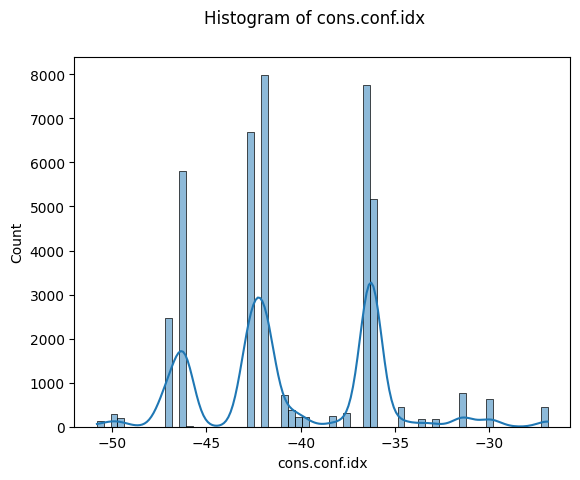

In [28]:
univariate_viz_with_desc("cons.conf.idx")

--------------------------------------------------------
Descriptive information of euribor3m: 
count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64
--------------------------------------------------------


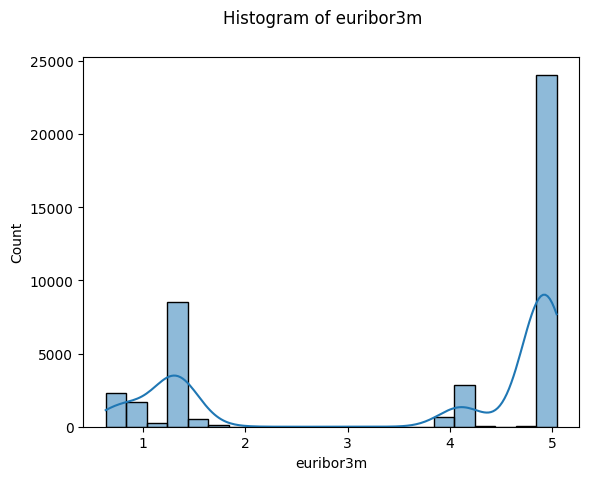

In [29]:
univariate_viz_with_desc("euribor3m")

--------------------------------------------------------
Descriptive information of nr.employed: 
count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64
--------------------------------------------------------


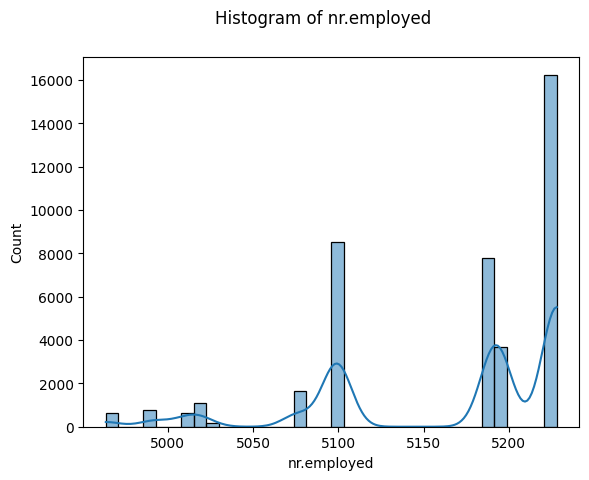

In [30]:
univariate_viz_with_desc("nr.employed")

<h1>Visualization after preprocessing of data</h1>

In [33]:
%store -r dataset_copy

In [34]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30604 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   30604 non-null  int64  
 1   job                   30604 non-null  object 
 2   marital               30604 non-null  object 
 3   education             30604 non-null  object 
 4   default               30604 non-null  object 
 5   housing               30604 non-null  object 
 6   loan                  30604 non-null  object 
 7   contact               30604 non-null  object 
 8   month                 30604 non-null  object 
 9   day_of_week           30604 non-null  object 
 10  duration              30604 non-null  int64  
 11  campaign              30604 non-null  int64  
 12  previously_contacted  30604 non-null  object 
 13  previous              30604 non-null  int64  
 14  emp.var.rate          30604 non-null  float64
 15  cons.conf.idx      

In [35]:
dataset_f = dataset_copy.copy()

### For Categorical variable

In [37]:
print(dataset_f.select_dtypes(include=object).columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'previously_contacted', 'y'],
      dtype='object')


In [38]:
categorical_columns_list = dataset_f.select_dtypes(include=object).columns.to_list()
categorical_columns_list = categorical_columns_list[:-1]
categorical_columns_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'previously_contacted']

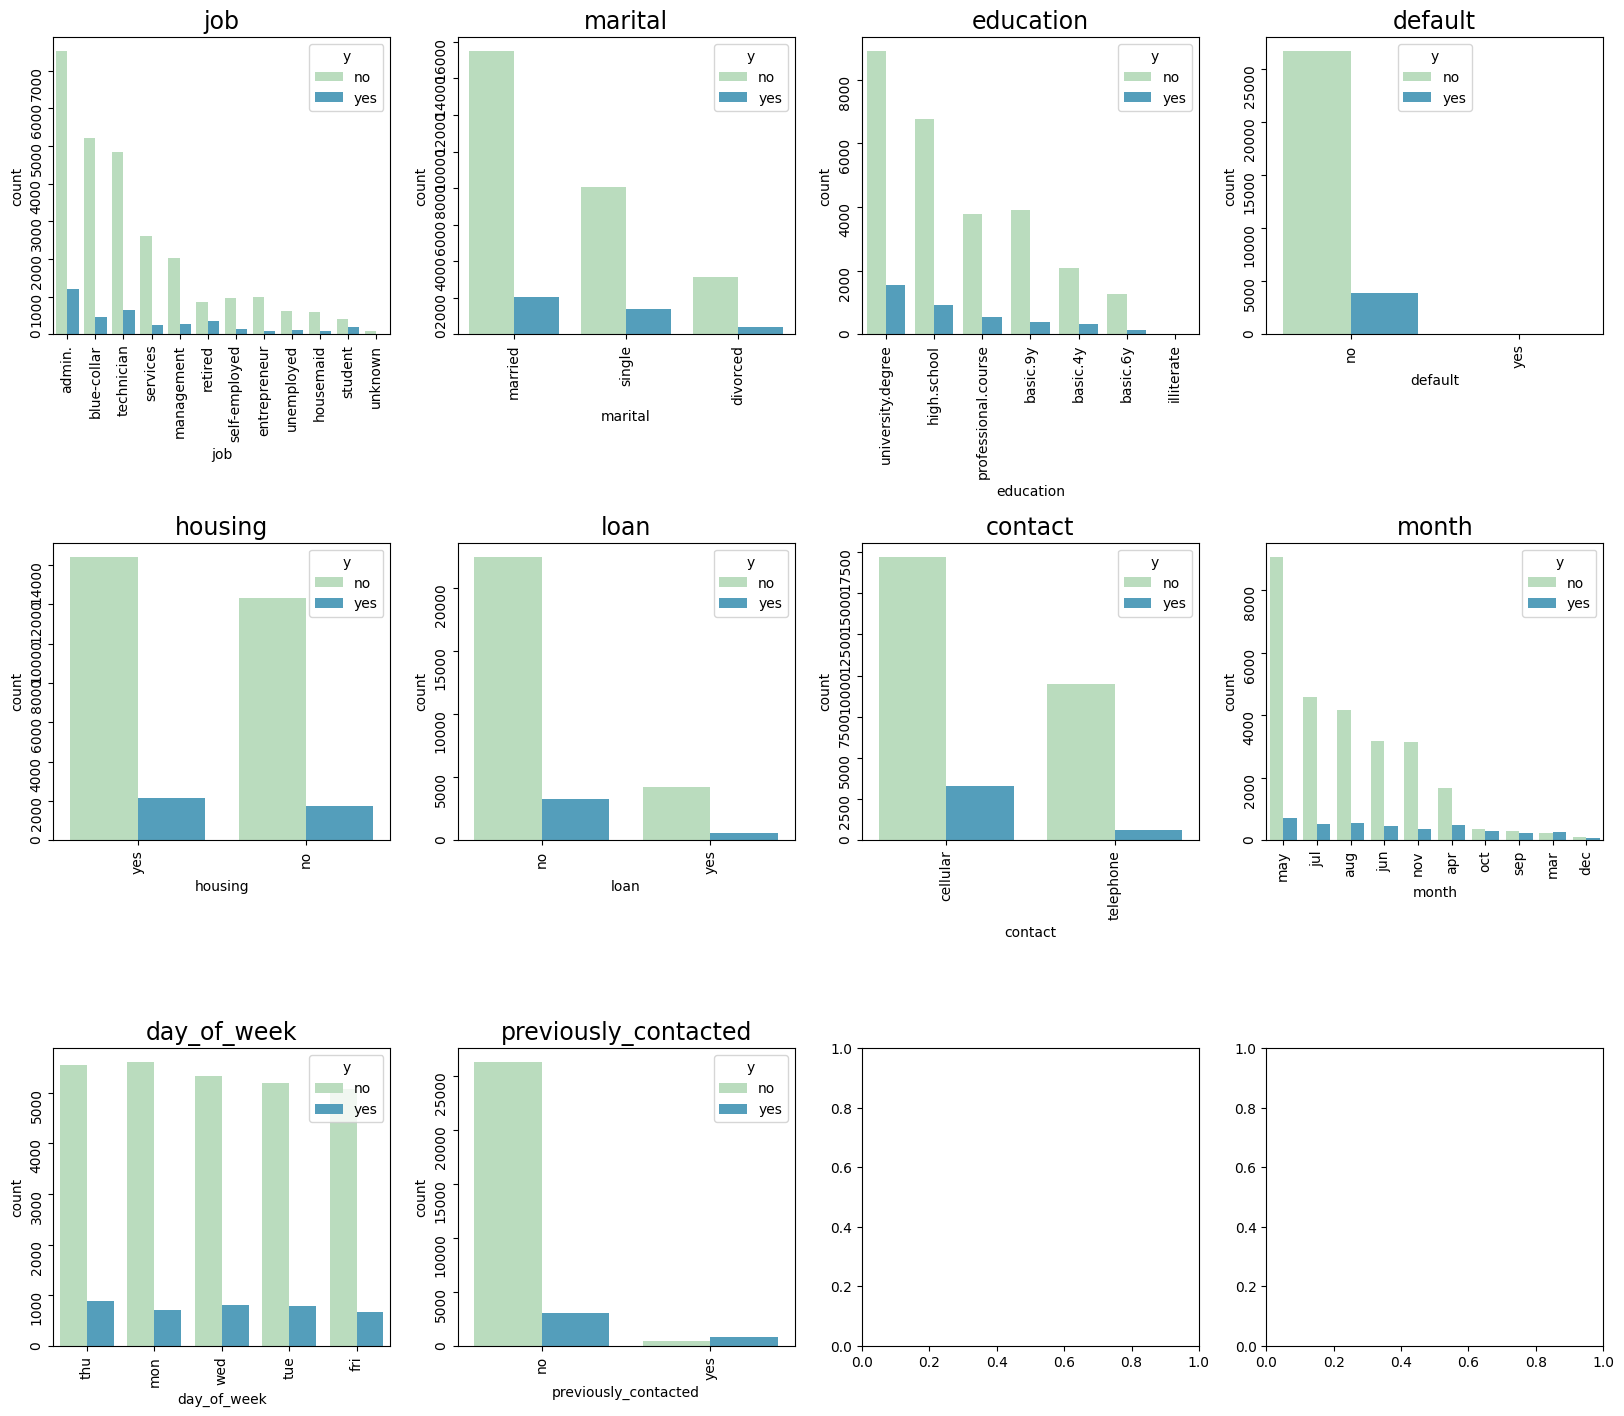

In [49]:
fig, ax = plt.subplots(3,4, figsize=(20,17))

ax = ax.ravel()
position = 0

for i in categorical_columns_list:
    
    order = dataset_f[i].value_counts().index
    sns.countplot(data=dataset_f, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

In [52]:
numerical_columns_lists = dataset_f.select_dtypes(include=np.number).columns.to_list()
numerical_columns_lists

['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.conf.idx']

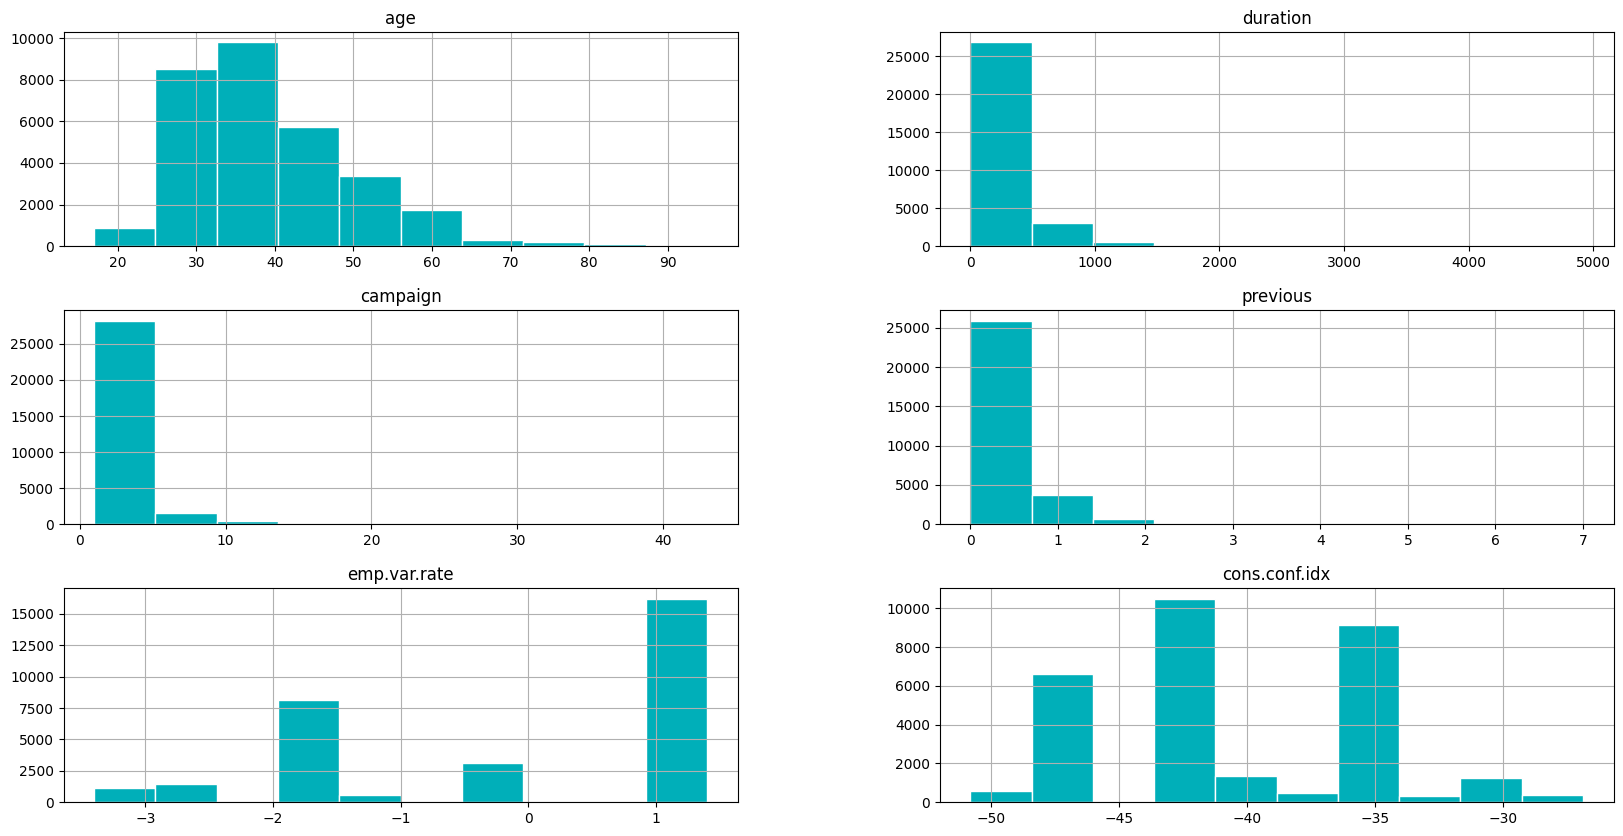

,age,duration,campaign,previous,emp.var.rate,cons.conf.idx
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.172963,0.081886,-40.502600
std,10.42125,259.279249,2.770014,0.494901,1.570960,4.628198
min,17.00000,0.000000,1.000000,0.000000,-3.400000,-50.800000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,-42.700000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,-41.800000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,-36.400000
max,98.00000,4918.000000,56.000000,7.000000,1.400000,-26.900000


In [55]:
dataset_f.hist(figsize=(20,10), edgecolor='white', color='#00afb9')
plt.show()

display(dataset[numerical_columns_lists].describe())

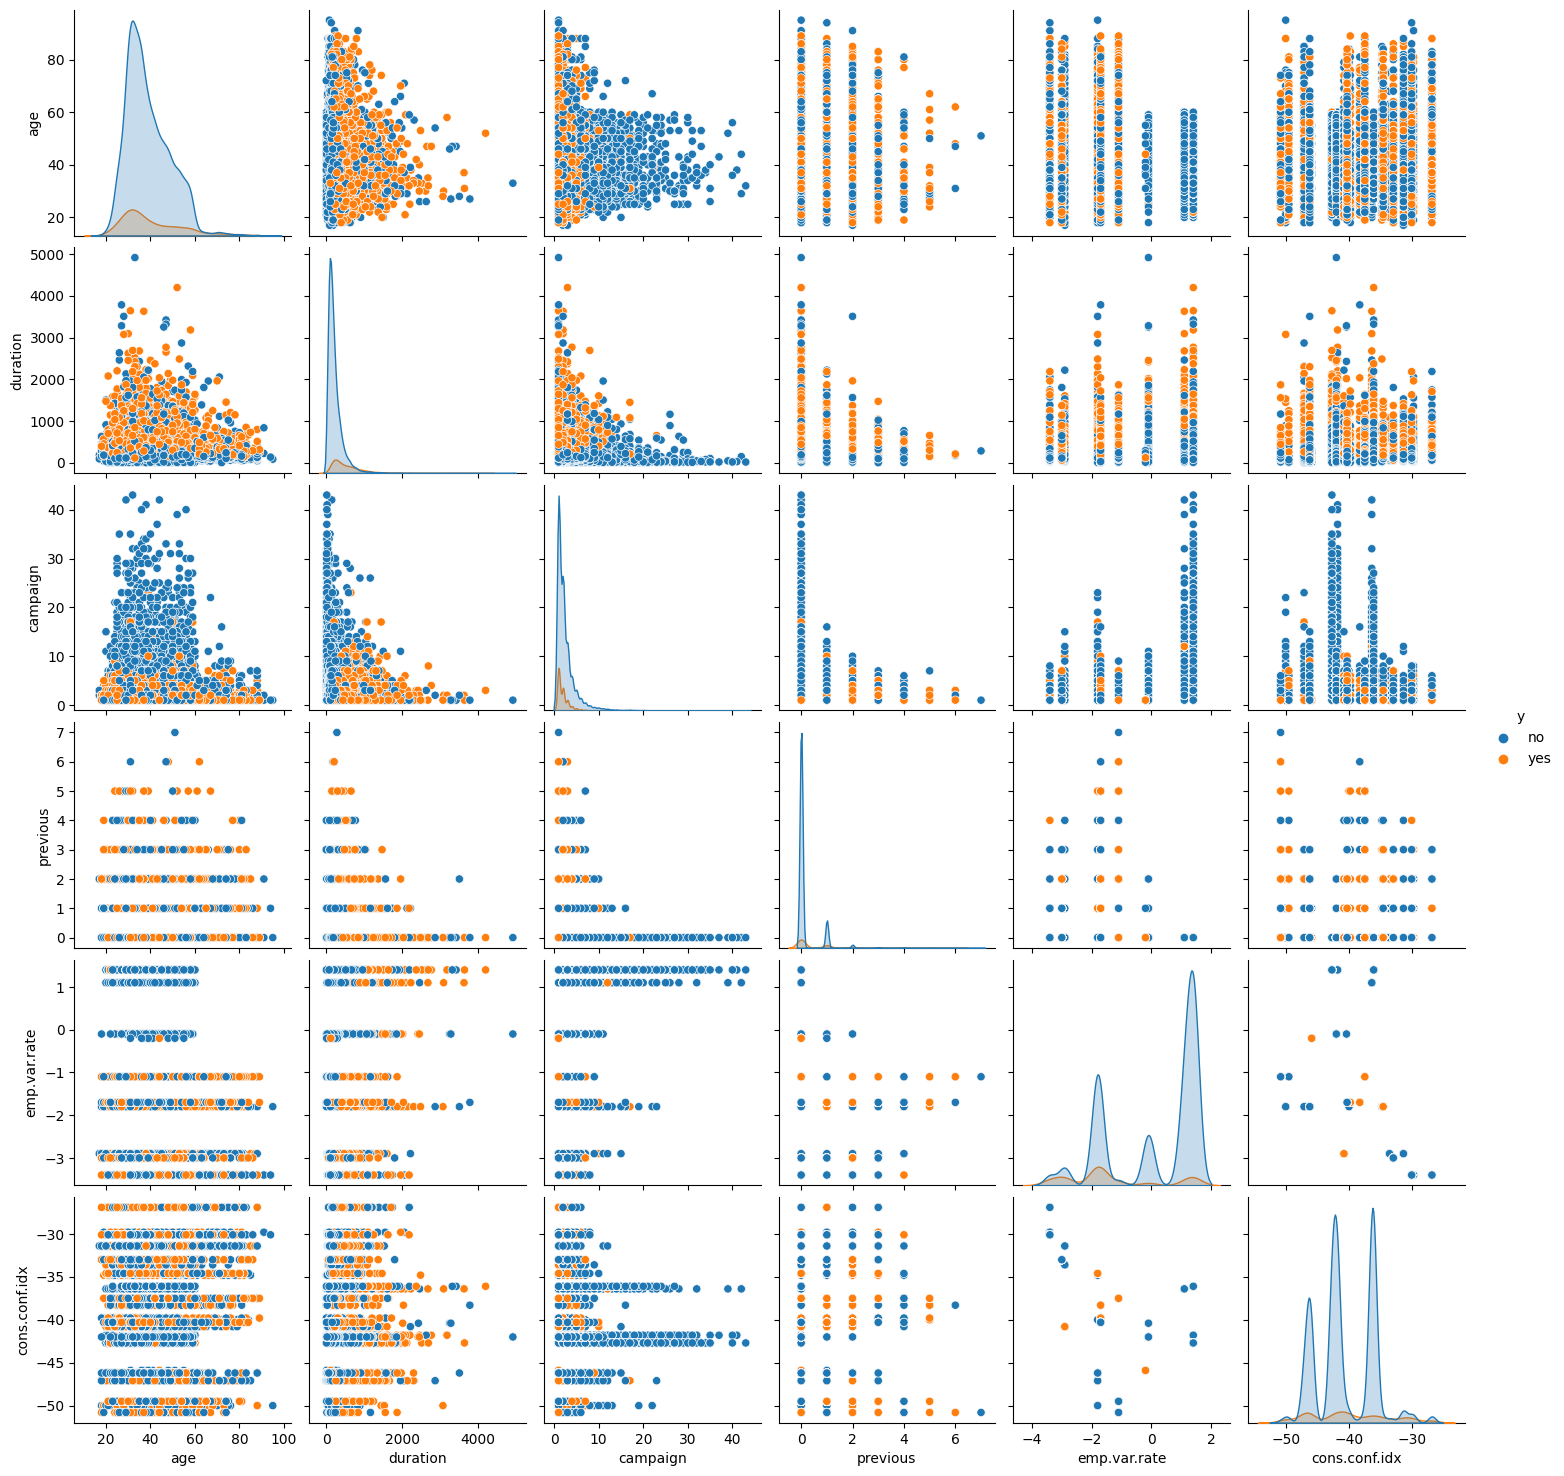

In [73]:
sns.pairplot(dataset_f, hue="y")

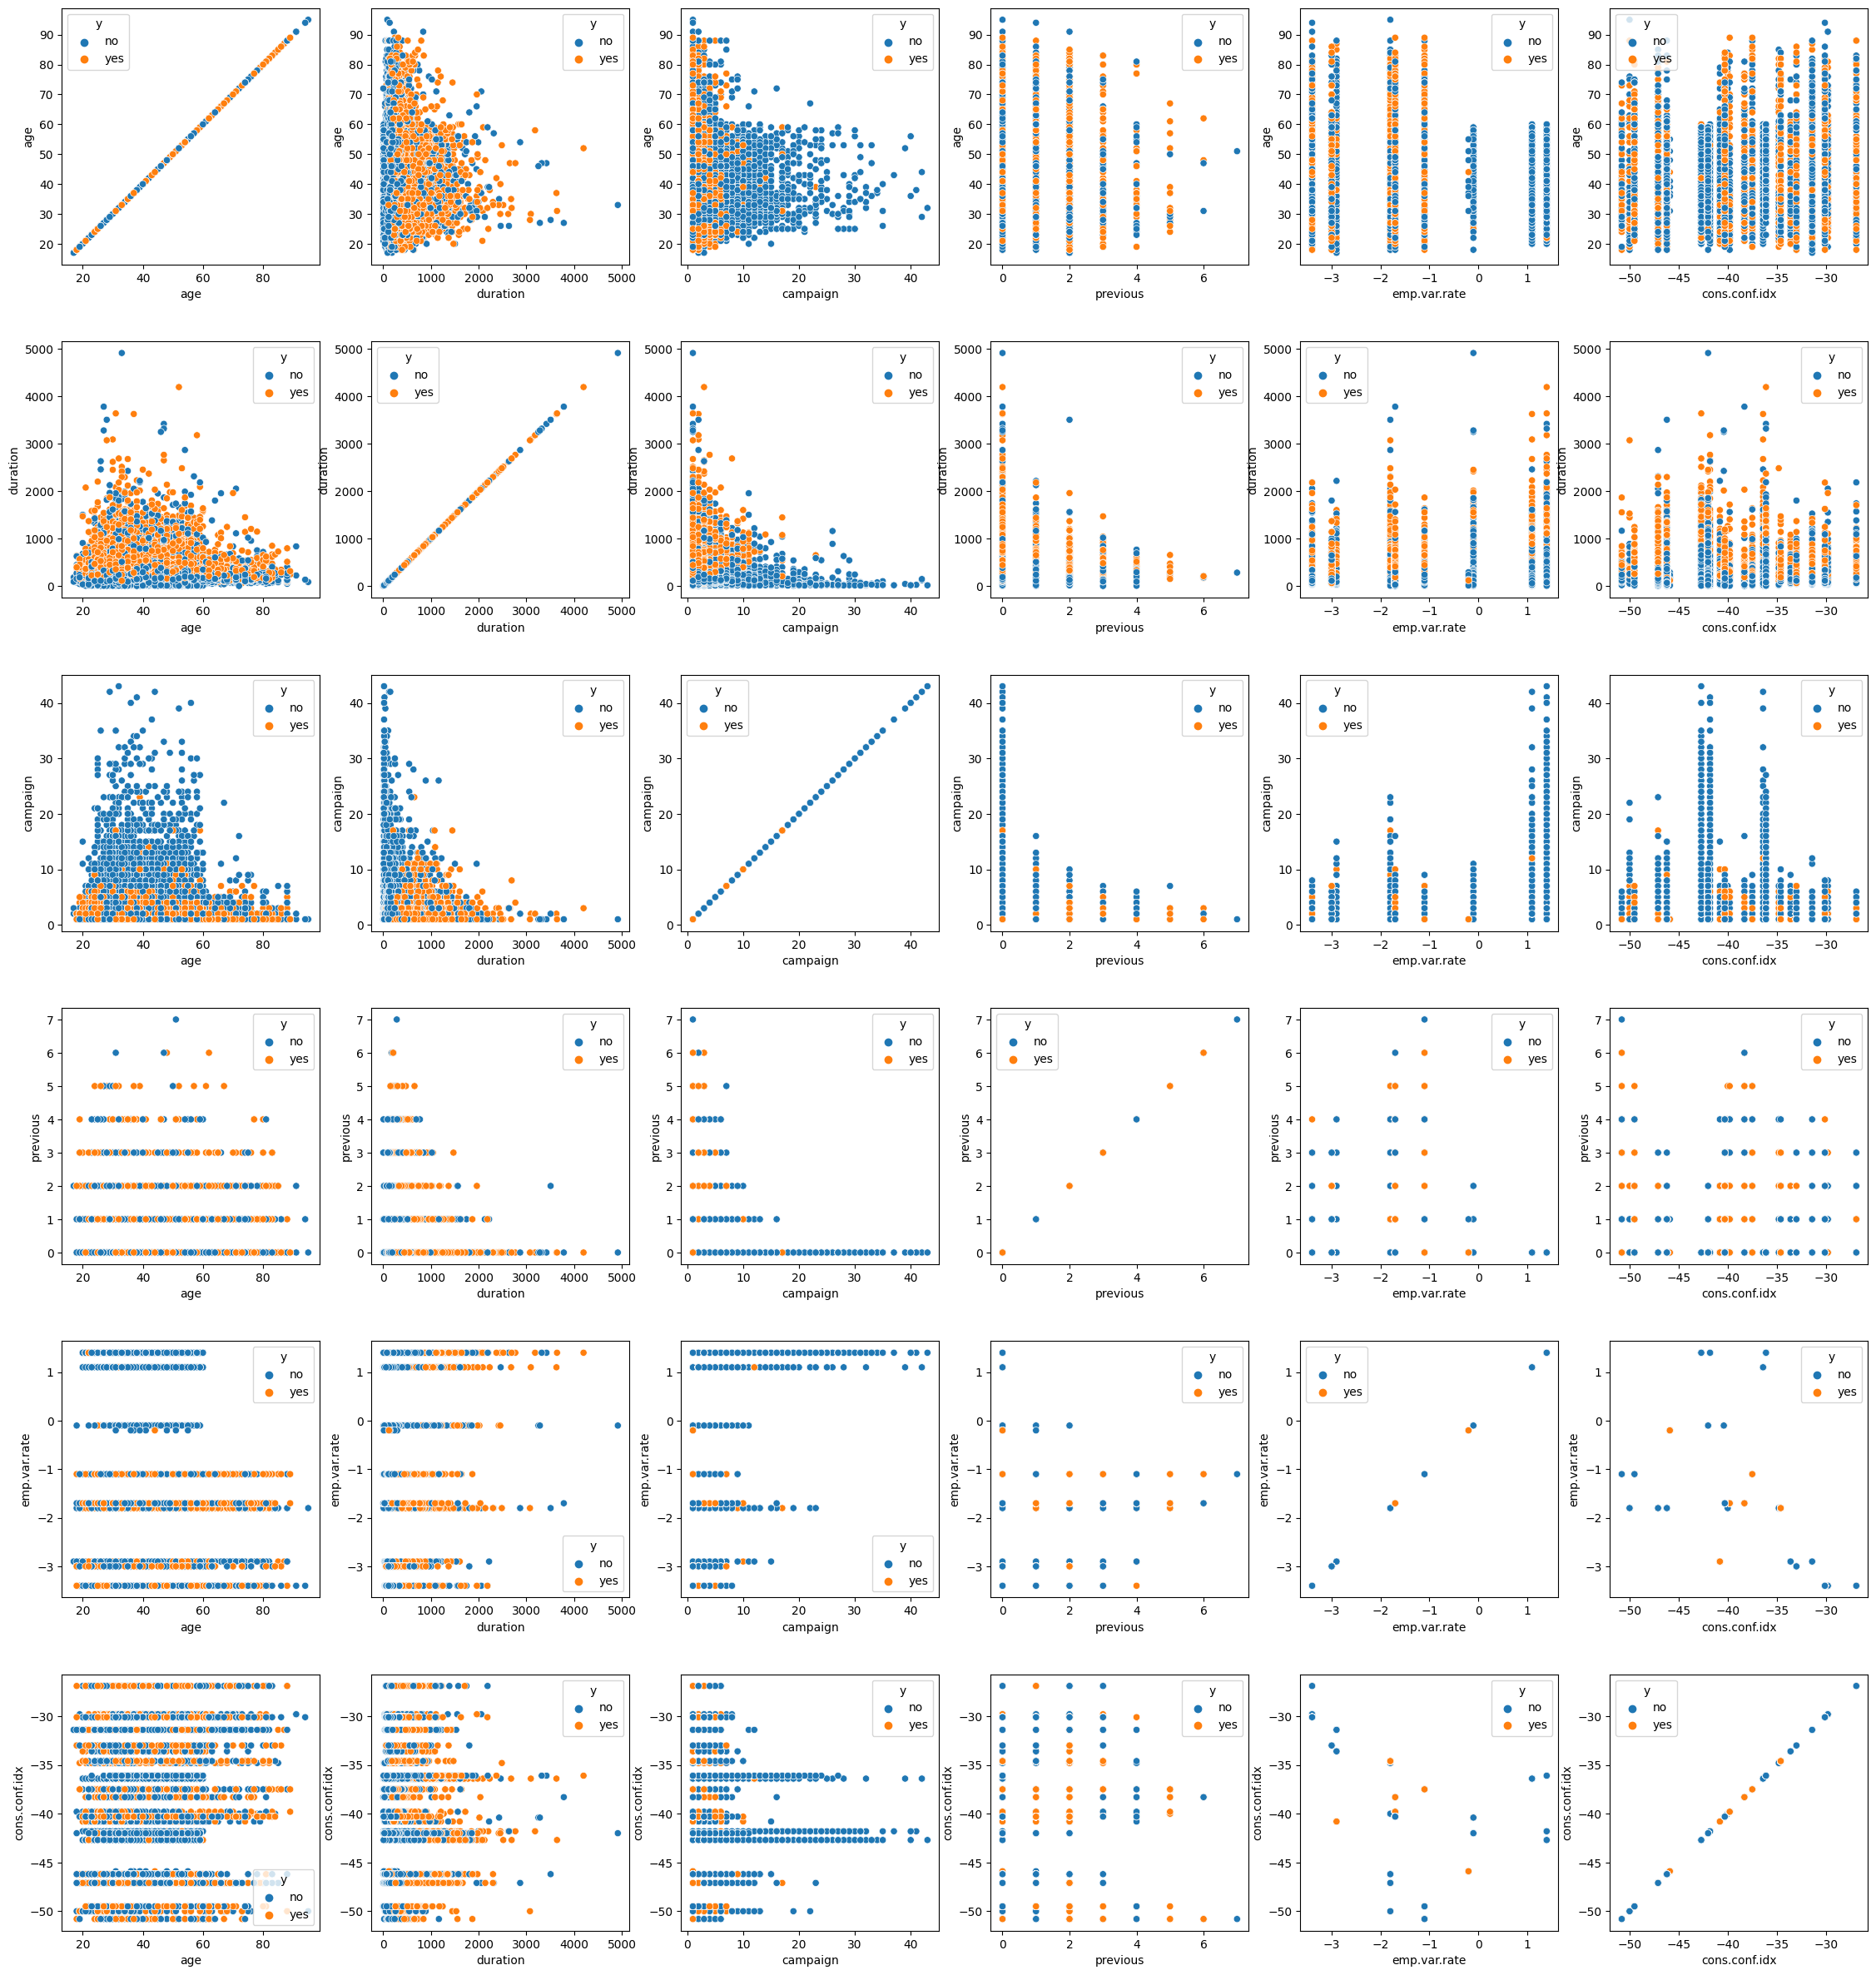

In [70]:
fig, ax = plt.subplots(6,6, figsize=(28,30))
ax = ax.ravel()
position = 0

for first_column in numerical_columns_lists:
    for second_column in numerical_columns_lists:
        sns.scatterplot(x=second_column, y=first_column, data=dataset_f, hue='y', ax=ax[position])
        position += 1

plt.subplots_adjust(hspace=0.3)
plt.show()